# Import Libraries and goto the HW folder where the datasets are saved. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Probelm: 2 (ISLR Textbook - Default Dataset)

https://github.com/JWarmenhoven/ISLR-python

In [4]:
%pwd

'/content'

In [5]:
cd /content/drive/MyDrive/Colab Notebooks/ML Workshop

/content/drive/MyDrive/Colab Notebooks/ML Workshop


In [6]:
ls

'Copy of workshop_1.ipynb'   Default.csv   Hitters.csv   HW#4


In [5]:
default = pd.read_csv("Default.csv", index_col = 0)

In [6]:
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [7]:
pd.isna(default)

,default,student,balance,income
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False
9999,False,False,False,False


In [8]:
default.isnull().values.any()

False

In [9]:
default["default_status"] = default.default.factorize()[0]

In [10]:
default.head()

,default,student,balance,income,default_status
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [12]:
X = sm.add_constant(default[["balance", "income"]])

In [13]:
X.shape

(10000, 3)

In [14]:
X

,const,balance,income
1,1.0,729.526495,44361.625074
2,1.0,817.180407,12106.134700
3,1.0,1073.549164,31767.138947
4,1.0,529.250605,35704.493935
5,1.0,785.655883,38463.495879
...,...,...,...
9996,1.0,711.555020,52992.378914
9997,1.0,757.962918,19660.721768
9998,1.0,845.411989,58636.156984
9999,1.0,1569.009053,36669.112365


In [15]:
y = default["default_status"]

In [16]:
y.shape

(10000,)

## i) Validation Set

Split 1: 
Train 50, Test 50

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
print(X_train.shape)
print(X_val.shape)
print("---***---")
print(y_train.shape)
print(y_val.shape)

(5000, 3)
(5000, 3)
---***---
(5000,)
(5000,)


In [20]:
log_regr = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.078493
         Iterations 10


In [21]:
print(log_regr.summary())

                           Logit Regression Results                           
Dep. Variable:         default_status   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Apr 2021   Pseudo R-squ.:                  0.4804
Time:                        22:49:57   Log-Likelihood:                -392.46
converged:                       True   LL-Null:                       -755.25
Covariance Type:            nonrobust   LLR p-value:                2.774e-158
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9681      0.640    -18.688      0.000     -13.223     -10.713
balance        0.0060      0.000     17.665      0.000       0.005       0.007
income      1.934e-05   6.99e-06      2.766      0.0

In [22]:
y_pred = log_regr.predict(X_val)

In [23]:
print("Accuracy score:", accuracy_score(y_val,y_pred.round()))

Accuracy score: 0.9742


In [24]:
cm = confusion_matrix(y_val, y_pred.round()) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[4818   23]
 [ 106   53]]


Split 2:
Train: 80 Test: 20

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print("---***---")
print(y_train.shape)
print(y_val.shape)

(8000, 3)
(2000, 3)
---***---
(8000,)
(2000,)


In [26]:
log_regr = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.076230
         Iterations 10


In [27]:
print(log_regr.summary())

                           Logit Regression Results                           
Dep. Variable:         default_status   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Apr 2021   Pseudo R-squ.:                  0.4743
Time:                        22:49:58   Log-Likelihood:                -609.84
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                9.963e-240
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8297      0.506    -23.387      0.000     -12.821     -10.838
balance        0.0058      0.000     22.038      0.000       0.005       0.006
income      2.075e-05   5.64e-06      3.682      0.0

In [28]:
y_pred = log_regr.predict(X_val)

In [29]:
print("Accuracy score:", accuracy_score(y_val,y_pred.round()))
print("\n")
cm = confusion_matrix(y_val, y_pred.round()) 
print ("Confusion Matrix : \n", cm) 

Accuracy score: 0.9695


Confusion Matrix : 
 [[1921   10]
 [  51   18]]


Split 3:
Train:90 Test: 10

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)
print("---***---")
print(y_train.shape)
print(y_val.shape)

(9000, 3)
(1000, 3)
---***---
(9000,)
(1000,)


In [31]:
log_regr = sm.Logit(y_train, X_train).fit()
print(log_regr.summary())

Optimization terminated successfully.
         Current function value: 0.077489
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         default_status   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8997
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Apr 2021   Pseudo R-squ.:                  0.4572
Time:                        22:49:58   Log-Likelihood:                -697.40
converged:                       True   LL-Null:                       -1284.9
Covariance Type:            nonrobust   LLR p-value:                7.411e-256
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5833      0.466    -24.846      0.000     -12.497     -10.670
balance        0.0056      0

In [32]:
y_pred = log_regr.predict(X_val)
print("Accuracy score:", accuracy_score(y_val,y_pred.round()))
print("\n")
cm = confusion_matrix(y_val, y_pred.round()) 
print ("Confusion Matrix : \n", cm)

Accuracy score: 0.967


Confusion Matrix : 
 [[954   4]
 [ 29  13]]


Comments: 

## ii) Leave One Out (LOOCV)

https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/

In [33]:
leave = LeaveOneOut()

In [35]:
model = LogisticRegression()

In [37]:
scores = cross_val_score(model, X, y, scoring="accuracy", cv=leave, n_jobs=1)

NameError: ignored

In [38]:
print("Accuracy: ", np.mean(scores))

Accuracy:  0.9736


Comments: 

## iii) K-fold CV

K=5

In [39]:
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
print("Accuracy: ", np.mean(scores))

Accuracy:  0.9733


K=2
Similar to the 
Validation Set Approach



In [41]:
# Similar to the Validation Set approach
scores = cross_val_score(model, X, y, scoring="accuracy", cv=2) 
print("Accuracy: ", np.mean(scores))

Accuracy:  0.9692000000000001


K = 1000, Similar to the Leave one Out Approach

In [43]:
# Similar to the Leave One Out
scores = cross_val_score(model, X, y, scoring="accuracy", cv=1000)
print("Accuracy: ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 333 members, which is less than n_splits=1000.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy:  0.9736


Comments: Using all these tecnhniques, we got almost the same accuracy score. It was approximately 97 percent for all the approaches. The only difference was the computation time. Validation set approach was the fastest among all. Then the K-fold and lastly the Leave One Out. 

# Problem: 3

## a) Generate the simulated dataset

In [7]:
np.random.seed(42)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x-2*x**2+n

In [8]:
x.shape

(100,)

In [9]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [10]:
y.shape

(100,)

In [12]:
n

array([-1.41537074, -0.42064532, -0.34271452, -0.80227727, -0.16128571,
        0.40405086,  1.8861859 ,  0.17457781,  0.25755039, -0.07444592,
       -1.91877122, -0.02651388,  0.06023021,  2.46324211, -0.19236096,
        0.30154734, -0.03471177, -1.16867804,  1.14282281,  0.75193303,
        0.79103195, -0.90938745,  1.40279431, -1.40185106,  0.58685709,
        2.19045563, -0.99053633, -0.56629773,  0.09965137, -0.50347565,
       -1.55066343,  0.06856297, -1.06230371,  0.47359243, -0.91942423,
        1.54993441, -0.78325329, -0.32206152,  0.81351722, -1.23086432,
        0.22745993,  1.30714275, -1.60748323,  0.18463386,  0.25988279,
        0.78182287, -1.23695071, -1.32045661,  0.52194157,  0.29698467,
        0.25049285,  0.34644821, -0.68002472,  0.2322537 ,  0.29307247,
       -0.71435142,  1.86577451,  0.47383292, -1.1913035 ,  0.65655361,
       -0.97468167,  0.7870846 ,  1.15859558, -0.82068232,  0.96337613,
        0.41278093,  0.82206016,  1.89679298, -0.24538812, -0.75

In this data set, what is n and what is p ?
From the above shapes of x and y we can see that: 
n = 100
p = 1

## b) Create a scatterplot of X against Y . Comment on what you find.

The plot is like an inverted parabola. 

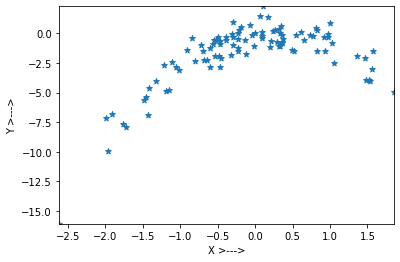

In [11]:
plt.scatter(x,y, marker="*")
plt.xlabel("X >--->")
plt.xlim(min(x), max(x))
plt.ylabel("Y >--->")
plt.ylim(min(y), max(y))
plt.show()

## c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares

In [10]:
np.random.seed(62)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x-2*x**2+n

In [11]:
x

array([-0.01232543, -0.52758101, -0.2875912 ,  1.12340038, -1.42222398,
        0.89402559, -1.52679872,  0.2404082 , -0.64209284,  1.59220229,
        0.10372735,  0.43178141, -0.03767419,  0.1888621 ,  0.29021923,
       -1.13860024, -1.51077575, -0.84649803, -0.02506186, -0.36482992,
       -1.04845259, -0.20275934, -1.44180197,  0.75069621, -0.7966201 ,
        0.60158758, -0.98443219, -1.02735745, -2.39270447,  0.36957382,
        0.6827009 , -0.59761047,  0.78132665,  0.46399774, -1.42116105,
       -1.17725121,  0.92947245,  0.21781148,  0.59136279,  1.08155875,
        0.25429032, -1.88220298, -0.52947764, -0.5162533 ,  0.2552099 ,
        1.57991736, -0.13702766,  0.15230374,  0.11096936, -1.80320686,
       -0.56796761,  0.02383654, -0.91718548,  0.92258282, -1.29299655,
       -1.29552301,  1.12573451,  0.60832356,  0.36244822, -0.0829837 ,
        0.76771265,  0.44747745,  0.01854535,  0.82534122, -0.58566041,
        0.39122278,  0.52462654, -0.21779032, -0.07895323,  1.30

In [12]:
y

array([ 4.19951201e-01, -1.31443964e+00,  1.19716002e+00, -9.14451039e-01,
       -6.72014246e+00, -5.58048371e-01, -7.21043589e+00,  7.01851691e-01,
        1.40882329e-01, -3.23012020e+00, -1.16875865e+00, -4.95316092e-01,
       -1.12708073e+00,  5.85691106e-03,  1.04003020e+00, -3.50936930e+00,
       -5.08454998e+00, -4.32684427e+00,  8.64207050e-01, -1.21896124e+00,
       -2.78772498e+00, -1.32446624e+00, -4.97036428e+00, -1.57059366e+00,
       -1.97591411e+00,  6.56212825e-02, -3.23934117e+00, -2.93510840e+00,
       -1.50247554e+01,  1.47274984e+00,  1.19557760e+00, -2.31145961e+00,
       -8.67605572e-01,  7.45364167e-01, -6.63481410e+00, -4.94411017e+00,
       -1.44192771e+00,  8.70009657e-02, -1.18475420e-01, -3.40305728e-01,
        2.43563539e-01, -8.81463905e+00, -2.95817706e-01, -1.89500996e+00,
        2.24819101e-01, -5.09527322e+00,  8.85146952e-01, -1.46479865e+00,
       -3.24689071e-01, -9.06441321e+00,  6.22490133e-01,  1.41791945e-01,
       -1.79303157e+00, -

In [13]:
df = pd.DataFrame(x, columns =['x'])

In [14]:
df["y"] = pd.DataFrame(y)

In [15]:
df.head()

,x,y
0,-0.012325,0.419951
1,-0.527581,-1.314440
2,-0.287591,1.197160
3,1.123400,-0.914451
4,-1.422224,-6.720142


### [i] Y = β0 + β1 X + e

In [16]:
leave = LeaveOneOut()

In [17]:
model = LinearRegression()

In [18]:
X = df["x"]

In [19]:
y = df["y"]

In [20]:
X.shape

(100,)

In [21]:
X = X.values.reshape(-1,1)

In [22]:
X.shape

(100, 1)

In [23]:
y = y.values.reshape(-1,1)

In [24]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -8.51636152994821


### [ii] Y = β0 + β1 X + β2 X2 + e

In [25]:
df["x^2"] = df.x * df.x
df.head()

,x,y,x^2
0,-0.012325,0.419951,0.000152
1,-0.527581,-1.314440,0.278342
2,-0.287591,1.197160,0.082709
3,1.123400,-0.914451,1.262028
4,-1.422224,-6.720142,2.022721


In [26]:
X = df[["x", "x^2"]]
X.shape

(100, 2)

In [27]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -1.0018352009672145


### [iii] Y = β0 + β1 X + β2 X2 + β3 X3 + e

In [28]:
df["x^3"] = df.x * df.x * df.x
df.head()

,x,y,x^2,x^3
0,-0.012325,0.419951,0.000152,-0.000002
1,-0.527581,-1.314440,0.278342,-0.146848
2,-0.287591,1.197160,0.082709,-0.023786
3,1.123400,-0.914451,1.262028,1.417763
4,-1.422224,-6.720142,2.022721,-2.876762


In [29]:
X = df[["x", "x^2", "x^3"]]
X.shape

(100, 3)

In [30]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -1.0175454759266476


### [iv] Y = β0 + β1 X + β2 X2 + β3 X3 + β4 X4 + e

In [31]:
df["x^4"] = df.x * df.x * df.x * df.x
df.head()

,x,y,x^2,x^3,x^4
0,-0.012325,0.419951,0.000152,-0.000002,2.307851e-08
1,-0.527581,-1.314440,0.278342,-0.146848,7.747411e-02
2,-0.287591,1.197160,0.082709,-0.023786,6.840728e-03
3,1.123400,-0.914451,1.262028,1.417763,1.592716e+00
4,-1.422224,-6.720142,2.022721,-2.876762,4.091400e+00


In [32]:
X = df[["x", "x^2", "x^3", "x^4"]]
X.shape

(100, 4)

In [33]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -1.1076955385640772


## d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [34]:
np.random.seed(10)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x-2*x**2+n

In [35]:
df2 = pd.DataFrame(y, columns =['y'])

In [36]:
df2["x"] = x

In [37]:
df2.head()

,y,x
0,-2.097183,1.331587
1,-2.215426,0.715279
2,-7.244834,-1.545400
3,0.461227,-0.008384
4,-0.295148,0.621336


### [i] Y = β0 + β1 X + e

In [38]:
x = df2["x"]

In [39]:
X = x.values.reshape(-1,1)

In [40]:
X.shape

(100, 1)

In [41]:
y = df["y"].values.reshape(-1,1)

In [42]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -9.371607083506865


### [ii] Y = β0 + β1 X + β2 X2 + e

In [43]:
df2["x^2"] = df2.x * df2.x
df2.head()

,y,x,x^2
0,-2.097183,1.331587,1.773123
1,-2.215426,0.715279,0.511624
2,-7.244834,-1.545400,2.388262
3,0.461227,-0.008384,0.000070
4,-0.295148,0.621336,0.386058


In [47]:
X = df2[["x", "x^2"]]
X.shape

(100, 2)

In [48]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -9.410584401414916


### [iii] Y = β0 + β1 X + β2 X2 + β3 X3 + e

In [46]:
df2["x^3"] = df2.x * df2.x * df2.x
df2.head()

,y,x,x^2,x^3
0,-2.097183,1.331587,1.773123,2.361066e+00
1,-2.215426,0.715279,0.511624,3.659539e-01
2,-7.244834,-1.545400,2.388262,-3.690821e+00
3,0.461227,-0.008384,0.000070,-5.892919e-07
4,-0.295148,0.621336,0.386058,2.398720e-01


In [49]:
X = df2[["x", "x^2", "x^3"]]
X.shape

(100, 3)

In [50]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -9.473102258332789


### [iv] Y = β0 + β1 X + β2 X2 + β3 X3 + β4 X4 + e

In [51]:
df2["x^4"] = df2.x * df2.x * df2.x * df2.x
df2.head()

,y,x,x^2,x^3,x^4
0,-2.097183,1.331587,1.773123,2.361066e+00,3.143964e+00
1,-2.215426,0.715279,0.511624,3.659539e-01,2.617591e-01
2,-7.244834,-1.545400,2.388262,-3.690821e+00,5.703796e+00
3,0.461227,-0.008384,0.000070,-5.892919e-07,4.940535e-09
4,-0.295148,0.621336,0.386058,2.398720e-01,1.490411e-01


In [52]:
X = df2[["x", "x^2", "x^3", "x^4"]]
X.shape

(100, 4)

In [53]:
scores = cross_val_score(model, X, y , cv=leave, scoring="neg_mean_squared_error")
print("Score: ", np.mean(scores))

Score:  -9.503954972800134


## e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The [iv] has the lowest LOOCV. No I did not expect this. The original equation is  in the squared form. It should have the least error among all. But as the order increased the error also decreased. 

## f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

No. The results cannot be drawn from LOOCV because every time the random seed will change the answer will change. 

# Problem: 4 (ISLR Textbook - Hitters Data Set –Linear, Ridge, Lasso Regression)

In this problem, you will use Hitters dataset (available on Canvas->DATASETS) which
contains records and salaries for baseball players. Set Salary as the output variable.

## (i) Download dataset, and remove all the rows that has NA

In [7]:
hitters = pd.read_csv("Hitters.csv", index_col = 0)

In [8]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 293 to 631
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hits       322 non-null    int64  
 1   HmRun      322 non-null    int64  
 2   Runs       322 non-null    int64  
 3   RBI        322 non-null    int64  
 4   Walks      322 non-null    int64  
 5   Years      322 non-null    int64  
 6   CAtBat     322 non-null    int64  
 7   CHits      322 non-null    int64  
 8   CHmRun     322 non-null    int64  
 9   CRuns      322 non-null    int64  
 10  CRBI       322 non-null    int64  
 11  CWalks     322 non-null    int64  
 12  League     322 non-null    object 
 13  Division   322 non-null    object 
 14  PutOuts    322 non-null    int64  
 15  Assists    322 non-null    int64  
 16  Errors     322 non-null    int64  
 17  Salary     263 non-null    float64
 18  NewLeague  322 non-null    object 
dtypes: float64(1), int64(15), object(3)
memory usage

In [9]:
hitters.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [13]:
hitters = hitters.dropna()

In [14]:
y = hitters["Salary"]

In [15]:
y.shape

(263,)

In [16]:
hitters = hitters.loc[ : , hitters.columns != "Salary"]
hitters.head()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
AtBat,,,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A


In [17]:
X = hitters

In [19]:
X.shape

(263, 18)

In [20]:
X

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
AtBat,,,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,N
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,A
475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,A


## (ii) Separate dataset into test and training

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_val.shape)

(210, 18)
(53, 18)


## (iii) Perform regular linear regression, Ridge regression, and Lasso regression

In [23]:
linear = LinearRegression()

## (iv) Obtain the results as a function of lambda, plot normalized coefficient wrt lambda

## (v) Choose best lambda using the cross validation.

## (vi) Comment on the results.